## 📌 Model3 – Geliştirilmiş CNN Modeli (Lamba & Saat)

### 👤 Öğrenci Bilgileri
Öğrenci Adı:	 ABDUL RAHMAN

Öğrenci Soyadı:	KHANOUM

Öğrenci No:	2212721317

GitHub Projesi:	https://github.com/Abood88088/CNN_siniflandirma

---

### Model3 Açıklaması
Bu çalışmada, tarafımdan cep telefonu kamerası ile çekilmiş **lamba** ve **saat** nesnelerine ait özgün görüntüler kullanılarak **Model3** adı verilen geliştirilmiş bir Convolutional Neural Network (CNN) modeli tasarlanmıştır.  

Model3’ün temel hedefi, önceki modellerde elde edilen sonuçları iyileştirmek amacıyla **veri artırımı**, **daha dengeli dropout kullanımı** ve **dinamik öğrenme oranı ayarlamaları** ile modelin genelleme yeteneğini artırmaktır.

---

### Kullanılan Mimari ve Yöntemler
Model3, sıfırdan oluşturulmuş ve aşağıdaki bileşenleri içeren bir CNN mimarisine sahiptir:

- 3 adet **Conv2D** katmanı (32 – 64 – 128 filtre)
- Her evrişim katmanından sonra **MaxPooling2D**
- **ReLU** aktivasyon fonksiyonu
- **Flatten** ve **Dense(128)** tam bağlantılı katman
- Overfitting’i azaltmak amacıyla **Dropout (0.25)**
- Çıkış katmanında **2 sınıf için Softmax**
- **ImageDataGenerator** ile veri artırımı:
  - rotation
  - zoom
  - horizontal flip
- **EarlyStopping** ve **ReduceLROnPlateau** callback’leri ile kontrollü eğitim

Bu yapı sayesinde model, lamba ve saat nesnelerinin şekil ve görsel özelliklerini daha etkili şekilde öğrenmiştir.

---

### Eğitim Süreci Analizi
Eğitim süreci incelendiğinde:

- İlk epoch’larda doğruluk değerleri dalgalı bir yapı göstermiştir.
- Epoch ilerledikçe eğitim doğruluğu düzenli olarak artmış ve %100 seviyelerine ulaşmıştır.
- Doğrulama doğruluğu genel olarak yüksek seyretmiş ve bazı epoch’larda %100 değerine ulaşmıştır.
- Loss değerleri zamanla azalmış, öğrenme oranının düşürülmesiyle daha stabil bir yapı elde edilmiştir.

Accuracy ve loss grafiklerinden, modelin öğrenme sürecinin kontrollü ve dengeli ilerlediği görülmektedir.

---

### Elde Edilen Sonuçlar (Gerçek Test Çıktılarına Göre)

- **Eğitim Doğruluğu (En Yüksek):** %100  
- **Doğrulama Doğruluğu (En İyi):** %100  
- **Test Doğruluğu:** **%95.00**  
- **Test Kayıp Değeri (Loss):** **0.1730**

---

### Genel Değerlendirme
Model3, uygulanan veri artırımı ve hiperparametre ayarlamaları sayesinde **yüksek doğruluk ve düşük kayıp değerleri** elde etmiştir.  

Model, test aşamasında %95 doğruluk sağlayarak **lamba ve saat sınıflarını başarılı bir şekilde ayırt edebildiğini** göstermiştir. Bu sonuçlar, Model3’ün önceki modellere kıyasla daha güçlü bir genelleme performansı sunduğunu ortaya koymaktadır.


1. Google Drive Bağlantısı

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Gerekli Kütüphanelerin Yüklenmesi

In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


3. Veri Setinin Train / Validation / Test Olarak Bölünmesi


In [43]:
import os, shutil, random
from pathlib import Path

DATASET_DIR = "/content/drive/MyDrive/CNN_siniflandirma/dataset"
OUTPUT_DIR  = "/content/data_split"

random.seed(42)

if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)

for split in ["train", "val", "test"]:
    for cls in os.listdir(DATASET_DIR):
        os.makedirs(os.path.join(OUTPUT_DIR, split, cls), exist_ok=True)

for cls in os.listdir(DATASET_DIR):
    imgs = list(Path(DATASET_DIR, cls).glob("*.jpg"))
    random.shuffle(imgs)

    n = len(imgs)
    n_train = int(n * 0.7)
    n_val   = int(n * 0.1)

    train_imgs = imgs[:n_train]
    val_imgs   = imgs[n_train:n_train+n_val]
    test_imgs  = imgs[n_train+n_val:]

    def copy_imgs(img_list, split):
        for img in img_list:
            shutil.copy(img, Path(OUTPUT_DIR, split, cls, img.name))

    copy_imgs(train_imgs, "train")
    copy_imgs(val_imgs, "val")
    copy_imgs(test_imgs, "test")

print("✅ Data split completed!")


✅ Data split completed!


4. Veri Artırma (Data Augmentation) ve Yükleme

In [44]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,      # ⬅ أخف
    zoom_range=0.05,        # ⬅ أخف
    horizontal_flip=True
)

val_gen  = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "/content/data_split/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    "/content/data_split/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_data = test_gen.flow_from_directory(
    "/content/data_split/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 70 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


5. Model3 – CNN Mimarisinin Oluşturulması

In [45]:
model3 = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.25),   # ⬅ Dropout منطقي
    layers.Dense(2, activation="softmax")
])


6. Modelin Derlenmesi (Compile)

In [46]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


7. Callback Mekanizmaları

In [47]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6)
]


8. Modelin Eğitilmesi

In [48]:
history3 = model3.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 9s/step - accuracy: 0.5768 - loss: 2.1632 - val_accuracy: 0.5000 - val_loss: 0.6754 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4642 - loss: 0.6876 - val_accuracy: 0.5000 - val_loss: 0.6846 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.3881 - loss: 0.7182 - val_accuracy: 0.5000 - val_loss: 0.7310 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5144 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5189 - loss: 0.6817 - val_accuracy: 0.5000 - val_loss: 0.6876 - learning_rate: 5.0000e-04
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4876 - loss: 0.6743 - val_accuracy: 0.5000 - val_loss: 0.6892 - learning_rate: 5.0000e-04
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5273 - loss: 0.6653 - val_accuracy: 0.9000

9. Accuracy ve Loss Grafiklerinin Çizdirilmesi

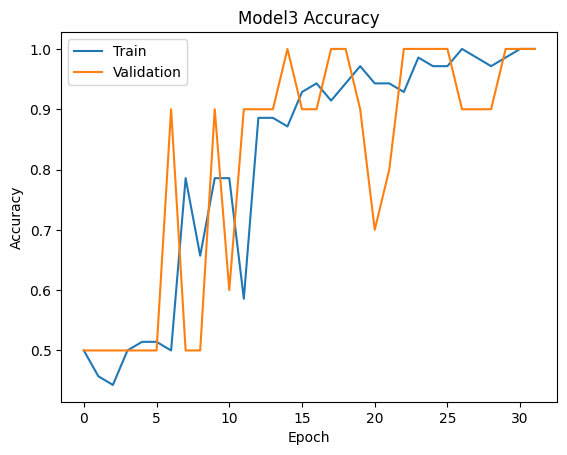

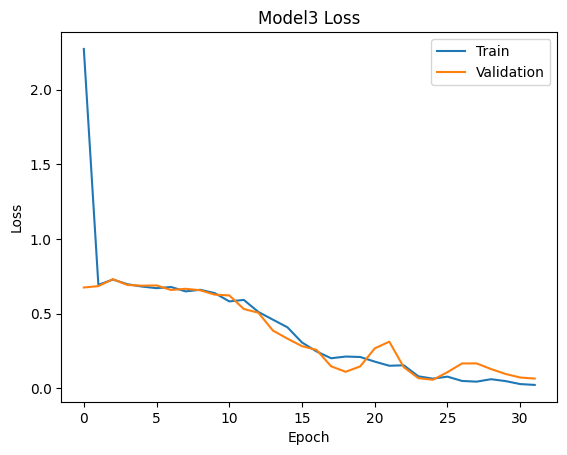

In [49]:
plt.plot(history3.history["accuracy"])
plt.plot(history3.history["val_accuracy"])
plt.title("Model3 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])
plt.title("Model3 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


10. Test Sonuçları

In [50]:
test_loss3, test_acc3 = model3.evaluate(test_data)
print(f"🚀 Model3 Test Accuracy: {test_acc3*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9500 - loss: 0.1730
🚀 Model3 Test Accuracy: 95.00%
